In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
%matplotlib inline

# Data generation

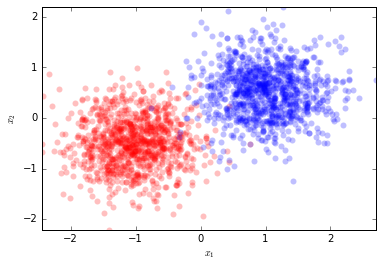

In [2]:
data_size = 2000
data_x_0 = np.zeros((data_size / 2, 2))
data_x_1 = np.zeros((data_size / 2, 2))

for row in range(data_size / 2):
    data_x_0[row] = (np.random.normal(-1., .5), np.random.normal(-0.5, .5))
    data_x_1[row] = (np.random.normal(+1., .5), np.random.normal(+0.5, .5))
data_x = np.row_stack((data_x_0, data_x_1))
data_y = np.row_stack((np.zeros((data_x_0.shape[0], 1)), np.ones((data_x_1.shape[0], 1))))
data_x, data_y = shuffle(data_x, data_y)

case_0_idx = np.where(data_y == 0)[0]
case_1_idx = np.where(data_y == 1)[0]

min_x = np.min(data_x[:,0])
max_x = np.max(data_x[:,0])
min_y = np.min(data_x[:,1])
max_y = np.max(data_x[:,1])

plt.axis((min_x, max_x, min_y, max_y))
plt.plot(data_x_0[:,0], data_x_0[:,1], 'ro', markeredgewidth=0.0, alpha=0.25)
plt.plot(data_x_1[:,0], data_x_1[:,1], 'bo', markeredgewidth=0.0, alpha=0.25)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

# Design

In [3]:
X  = tf.placeholder(tf.float32)
y  = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_uniform([2, 1], -1.0, 1.0))        
b = tf.Variable(tf.zeros([1]))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
loss = tf.reduce_mean(-y * tf.log(hypothesis) - (1-y) * tf.log(1-hypothesis))
print(X)
print(W)
print(y)

Tensor("Placeholder:0", dtype=float32)
Tensor("Variable/read:0", shape=(2, 1), dtype=float32)
Tensor("Placeholder_1:0", dtype=float32)


# Trainining and visualization

The decision boundary is computed based on an equation $w_1 x_1 + w_2 x_2 + b = 0$.

iter	w1	w2	b	loss
1	0.308	-0.493	0.000	0.673
100	2.020	0.563	0.014	0.142
200	2.586	0.918	0.019	0.096
300	2.944	1.139	0.024	0.078
400	3.211	1.300	0.028	0.069
500	3.426	1.427	0.032	0.062
600	3.606	1.532	0.036	0.058
700	3.763	1.622	0.040	0.055
800	3.901	1.699	0.044	0.052
900	4.025	1.768	0.047	0.050
1000	4.138	1.829	0.051	0.049


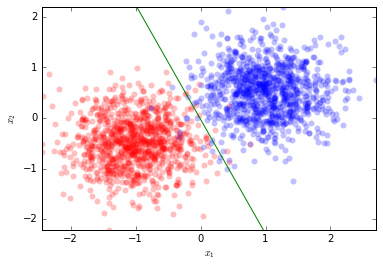

In [4]:
optimizer = tf.train.GradientDescentOptimizer(tf.Variable(0.1))
train_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    # Fit the model
    sess.run(init)
    print('iter\tw1\tw2\tb\tloss')
    for i in xrange(1000):
        sess.run(train_op, feed_dict={X:data_x, y:data_y})
        if ((i+1) % 100 == 0) or i == 0:
            print '%d\t%.3f\t%.3f\t%.3f\t%.3f'%(i+1, sess.run(W)[0], sess.run(W)[1], sess.run(b)[0],
                                          sess.run(loss, feed_dict={X:data_x, y:data_y}))
    
    # Print the results
    line_x = np.array([np.min(data_x[:,0]), np.max(data_x[:,0])])
    line_y = (float(sess.run(W)[0]) * line_x + float(sess.run(b))) / -float(sess.run(W)[1])
    plt.axis((min(data_x[:,0]), max(data_x[:,0]), min(data_x[:,1]), max(data_x[:,1])))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.plot(data_x_0[:,0], data_x_0[:,1], 'ro', markeredgewidth=0.0, alpha=0.25)
    plt.plot(data_x_1[:,0], data_x_1[:,1], 'bo', markeredgewidth=0.0, alpha=0.25)
    plt.plot(line_x, line_y, 'g')
    plt.show()